# Aula 01 - Biblioteca Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head() # Informa (por padrão) as primeiras 5 linhas do arquivo

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info() # Detalhes importantes sobre os dados (não nulos, tipos, etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe() # Algumas análises estatísticas descritivas

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.shape # Dimensão do arquivo = 133349x11 (lin x col)

(133349, 11)

In [7]:
lin, col = df.shape
print(f"Linhas: {lin}\nColunas: {col}")

Linhas: 133349
Colunas: 11


In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
# Renomeando as colunas para o português

from os import rename
rename_col = {
    'work_year': 'ano',
    'experience_level': "nvl_xp",
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'loc_empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=rename_col, inplace=True)
df.columns

Index(['ano', 'nvl_xp', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'loc_empresa', 'tamanho_empresa'],
      dtype='object')

In [10]:
'''
  SE = Senior
  MI = Pleno
  EN = Junior
  EX = Executivo

  Conta as aparições da coluna 'nivel_experiencia'
'''
df['nvl_xp'].value_counts()

,count
nvl_xp,
SE,77241
MI,40465
EN,12443
EX,3200


In [11]:
rename_xp = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df["nvl_xp"] = df["nvl_xp"].replace(rename_xp)
df["nvl_xp"].value_counts()

,count
nvl_xp,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [12]:
'''
  FT = Full Time
  CT = Contract Temporary
  PT = Part Time
  FL = Freelance
'''

df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [13]:
rename_contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato Temporario',
    'PT': 'Tempo Parcial',
    'FL': 'Freela'
}

df["contrato"] = df["contrato"].replace(rename_contrato)
df["contrato"].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato Temporario,394
Tempo Parcial,376
Freela,16


In [14]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [15]:
rename_tamanho = {
    'S': 'Pequena',
    'M': 'Média',
    'L': 'Grande'
}

df["tamanho_empresa"] = df["tamanho_empresa"].replace(rename_tamanho)
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
Média,129561
Grande,3574
Pequena,214


In [16]:
'''
  0   = presenciais
  50  = híbridas
  100 = remotas
'''

df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [17]:
rename_remoto = {
    0: 'Presencial',
    50: 'Hibrido',
    100: 'Remoto'
}

df["remoto"] = df["remoto"].replace(rename_remoto)
df["remoto"].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [18]:
df.head()

,ano,nvl_xp,contrato,cargo,salario,moeda,usd,residencia,remoto,loc_empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [19]:
df.describe(include="object") # Descrição de valores DESCRITIVAS/CATEGÓRICAS
#unique = 26 tipos de moedas, 4 niveis de xp, 4 tipos de contrato...
# top = descrição mais frequente
# freq = frequencia da descricao mais frequente

,nvl_xp,contrato,cargo,moeda,residencia,remoto,loc_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [20]:
df.describe() # Descrição de valores NUMÉRICOS

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


# Aula 02 - Preparando os Dados

In [21]:
# Soma os itens que são nulos.
# 10 registros não possuem a variável ano

df.isnull().sum()

,0
ano,10
nvl_xp,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
loc_empresa,0


In [22]:
# unique() mostra os valores que estçao registrados no df['ano']
# nan = not a number

df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [23]:
# Dentro do [] colocamos um filtro
# Traga tudo do dataframe que é NULL e imprima.

df[df.isnull().any(axis=1)]

,ano,nvl_xp,contrato,cargo,salario,moeda,usd,residencia,remoto,loc_empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


## Exemplo com outro DF
Exemplo decomo manipular o DF com dados de salário ausentes.

In [24]:
import numpy as np

In [25]:
df_salarios = pd.DataFrame({
    "nome":["Marcelo", "Bruno", "Ana", "Carlos", "Val"],
    "salario": [4000, np.nan, 5000, np.nan, 100000]
})

In [26]:
# Cria-se uma coluna nova 'salario_media' com os salarios
# fillna == preenche os valores nulos -> fill null
# Preenche os valores nulos com a média salarial da coluna mean()
# round(2) = arredonda para 2 casas decimais

# Essa é uma técnica para pode utilizar as informações sem aterar muito os dados.
# Mas caso haja um dado muito destoante (outlier), é melhor utilizar a mediana = median().

df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

In [27]:
# É possível observar como é discrepante a diferençada média e mediana salarial
# utilizando esses dois métodos diferentes.
print(df_salarios)

      nome   salario  salario_media  salario_mediana
0  Marcelo    4000.0        4000.00           4000.0
1    Bruno       NaN       36333.33           5000.0
2      Ana    5000.0        5000.00           5000.0
3   Carlos       NaN       36333.33           5000.0
4      Val  100000.0      100000.00         100000.0


### Exemplo 2

In [28]:
df_temperatura = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperatura": [30, np.nan, np.nan, 28, 27]
})

In [29]:
df_temperatura['preenchido_ffill'] = df_temperatura['Temperatura'].ffill()

# ffill() = foward fill = preenche com o valor anterior (foward no sentido de onde está o NaN em relação ao dado)
# bfill() = back fill = preenche com o valor posterior (back no sentido de onde está o NaN em relação ao dado)
df_temperatura

,Dia,Temperatura,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


### Exemplo 3

In [30]:
df_cidades = pd.DataFrame({
    "nome": ["Marcelo", "Bruno", "Ana", "Carlos", "Val"],
    "cidade": ["São Paulo", np.nan, "Maceió", np.nan, "Bonito"]
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna("Não informado")
df_cidades

,nome,cidade,cidade_preenchida
0,Marcelo,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Ana,Maceió,Maceió
3,Carlos,NaN,Não informado
4,Val,Bonito,Bonito


### Tratando os dados

In [31]:
# dropna() retira todas as informações que possuem as informações nulas
df_limpo = df.dropna()

In [32]:
df_limpo.isnull().sum()

,0
ano,0
nvl_xp,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
loc_empresa,0


In [33]:
df_limpo.info()
# Vamos alterar o tipo de ano para int

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   nvl_xp           133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   loc_empresa      133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [34]:
# Alteramos o tipo com .astype()
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype("int64"))
df_limpo = df_limpo.assign(salario = df_limpo['salario'].astype("float64").round(2))
df_limpo = df_limpo.assign(usd = df_limpo['usd'].astype("float64").round(2))

In [35]:
df_limpo.head()

,ano,nvl_xp,contrato,cargo,salario,moeda,usd,residencia,remoto,loc_empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000.0,USD,214000.0,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000.0,USD,136000.0,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800.0,USD,158800.0,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200.0,USD,139200.0,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000.0,USD,90000.0,US,Presencial,US,Média


# Aula 03

In [36]:
df_limpo.head()

,ano,nvl_xp,contrato,cargo,salario,moeda,usd,residencia,remoto,loc_empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000.0,USD,214000.0,US,Remoto,US,Média
1,2025,Senior,Tempo Integral,Solutions Engineer,136000.0,USD,136000.0,US,Remoto,US,Média
2,2025,Pleno,Tempo Integral,Data Engineer,158800.0,USD,158800.0,AU,Presencial,AU,Média
3,2025,Pleno,Tempo Integral,Data Engineer,139200.0,USD,139200.0,AU,Presencial,AU,Média
4,2025,Junior,Tempo Integral,Data Engineer,90000.0,USD,90000.0,US,Presencial,US,Média


<Axes: title={'center': 'Distribuição de Experiência'}, xlabel='nvl_xp'>

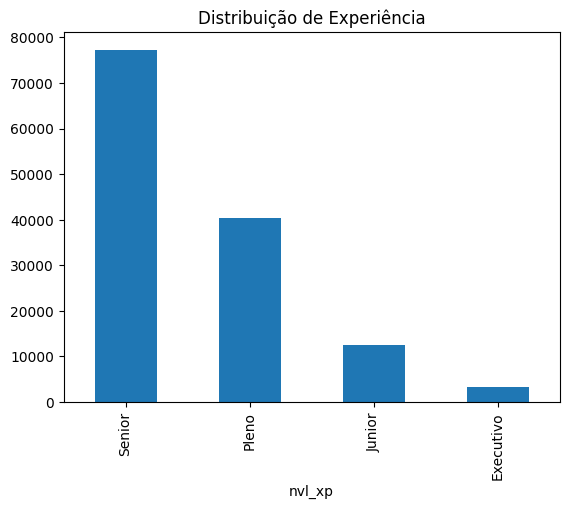

In [37]:
df_limpo['nvl_xp'].value_counts().plot(kind='bar', title="Distribuição de Experiência")

## Usando Seaborn e Matplotlib

In [38]:
import seaborn as sns

<Axes: xlabel='nvl_xp', ylabel='usd'>

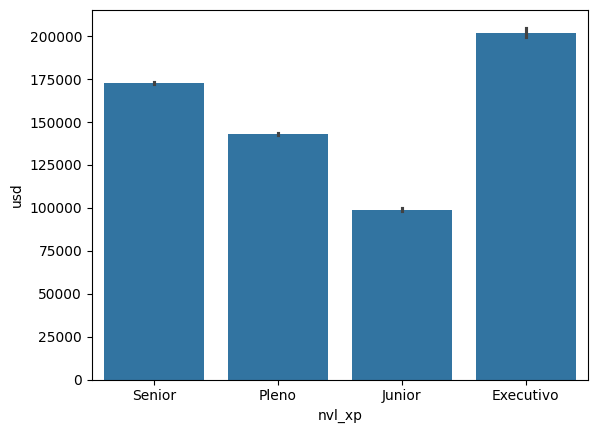

In [39]:
# Média salarial para cada uma das categorias
sns.barplot(data=df_limpo, x='nvl_xp', y='usd')

In [40]:
import matplotlib.pyplot as plt

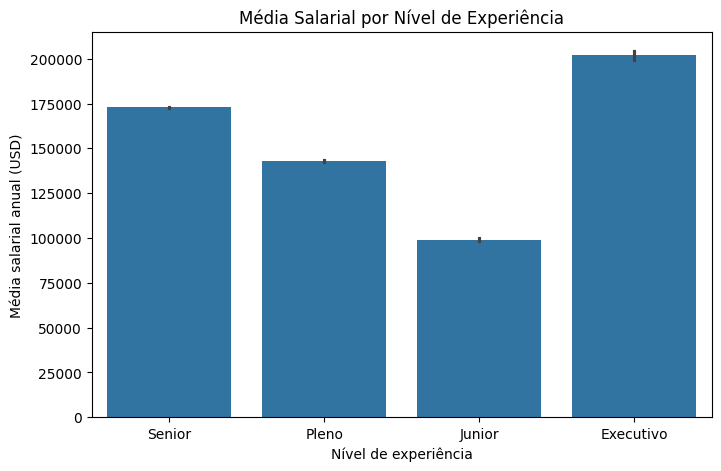

In [41]:
plt.figure(figsize=(8, 5)) # Tamanho padrão usual
sns.barplot(data=df_limpo, x='nvl_xp', y='usd')
plt.title("Média Salarial por Nível de Experiência")
plt.xlabel("Nível de experiência")
plt.ylabel("Média salarial anual (USD)")
plt.show()

In [42]:
# Organizando o nivel de experiencia em ordem decrescente em relação a média salarial
df_limpo.groupby('nvl_xp')['usd'].mean().sort_values(ascending=False).round(2)

,usd
nvl_xp,
Executivo,202027.67
Senior,172850.84
Pleno,143044.85
Junior,99034.96


In [43]:
# Ordem indexado, ou seja, uma lista na ordem certa
ordem = df_limpo.groupby('nvl_xp')['usd'].mean().sort_values(ascending=True).round(2).index

# Ordem de tuplas
ordem1 = df_limpo.groupby('nvl_xp')['usd'].mean().sort_values(ascending=True).round(2)

In [44]:
print(ordem)
print()
print(ordem1)

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='nvl_xp')

nvl_xp
Junior        99034.96
Pleno        143044.85
Senior       172850.84
Executivo    202027.67
Name: usd, dtype: float64


Gráfico em Barras

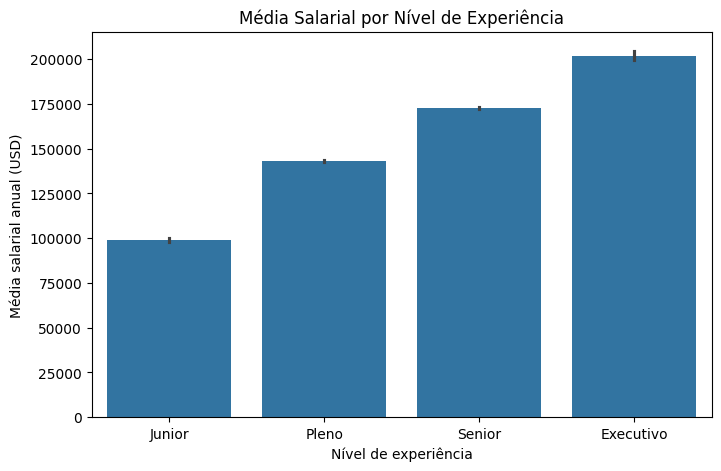

In [45]:
plt.figure(figsize=(8, 5)) # Tamanho padrão usual
sns.barplot(data=df_limpo, x='nvl_xp', y='usd', order=ordem) # Adicionado o padrão do gráfico
plt.title("Média Salarial por Nível de Experiência")
plt.xlabel("Nível de experiência")
plt.ylabel("Média salarial anual (USD)")
plt.show()

Gráfico de Histogramas

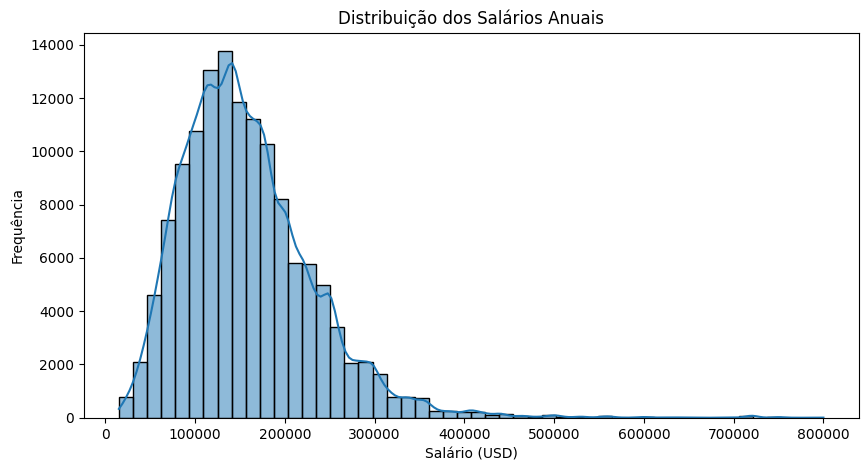

'\n  Distribuição não é "normal" por não estar com o \'pico\' no meio do histograma\n  Várias pessoas estão perto de 800k, por isso não está igualmente distribuído\n'

In [46]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_limpo['usd'], bins=50, kde=True)
  # bins  = largura das barras
  #  kde  = linhha que acompanha as barras do histograma
plt.title("Distribuição dos Salários Anuais")
plt.xlabel("Salário (USD)")
plt.ylabel("Frequência")
plt.show()

'''
  Distribuição não é "normal" por não estar com o 'pico' no meio do histograma
  Várias pessoas estão perto de 800k, por isso não está igualmente distribuído
'''

Gráfico Diagrama de Caixa (Boxplot)

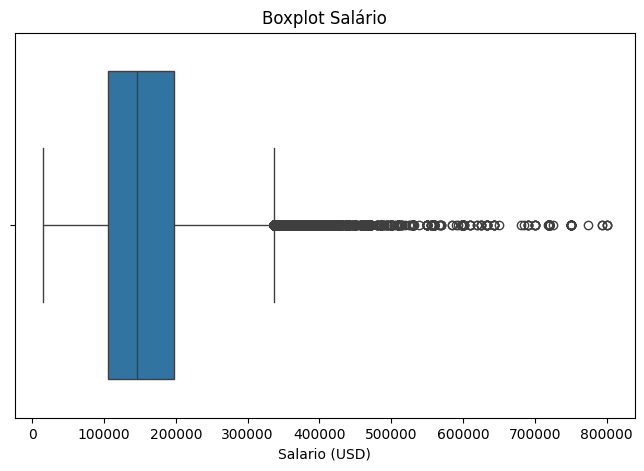

'\n  Possível observar uma quantidade enorme de outliers, que reflete\n  o gráfico anterior não se tratar de um Distruibuição Normal, por\n  ter pessoas perto dos 800k, longe da "média"\n'

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title("Boxplot Salário")
plt.xlabel("Salario (USD)")
plt.show()

'''
  Possível observar uma quantidade enorme de outliers, que reflete
  o gráfico anterior não se tratar de um Distruibuição Normal, por
  ter pessoas perto dos 800k, longe da "média"
'''

Boxplot do salário dividido pelos níveis de experiência

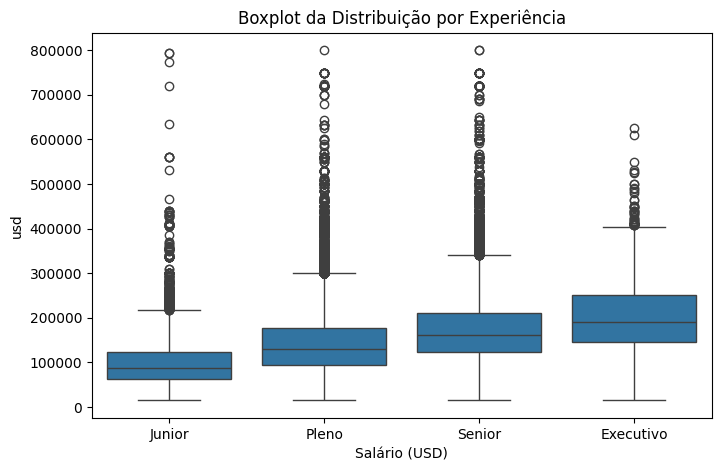

In [48]:
ordem_xp = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x='nvl_xp', y='usd', order=ordem_xp)
plt.title("Boxplot da Distribuição por Experiência")
plt.xlabel("Salário (USD)")
plt.show()

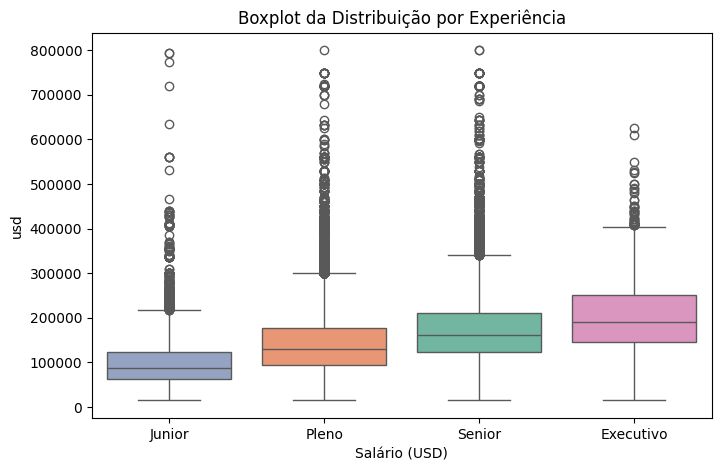

In [49]:
ordem_xp = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x='nvl_xp', y='usd', order=ordem_xp, palette='Set2', hue='nvl_xp')
  # palette e hue = colorem diferentemente a categoria desejada
plt.title("Boxplot da Distribuição por Experiência")
plt.xlabel("Salário (USD)")
plt.show()

## Usando plotly

Gráficos interativos utilizando Plotly

In [50]:
import plotly.express as px

Média salarial baseada no nível de experiência



Gráfico de Barras

In [51]:
media_salarial_xp = df_limpo.groupby('nvl_xp')['usd'].mean().sort_values(ascending=True).reset_index()

fig = px.bar(
    media_salarial_xp,
    x='nvl_xp',
    y='usd',
    title='Média Salaria por Nível de Experiência',
    labels={
        'nvl_xp': 'Nível de Experiência',
        'usd': 'Média Salarial'
    }
)

fig.show()

# Possível ver a média salarial passando o mouse nas barras

Gráfico de Pizza

In [52]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Distribuição de Trabalho Remoto',
    labels={
        'tipo_trabalho': 'Tipo de Trabalho',
        'quantidade': 'Quantidade'
    }
  )

fig.show()

Gráfico Rosca

In [53]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Distribuição de Trabalho Remoto',
    hole=0.5, # Adicionado
    labels={
        'tipo_trabalho': 'Tipo de Trabalho',
        'quantidade': 'Quantidade'
    }
  )

fig.show()

In [54]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='tipo_trabalho',
    values='quantidade',
    title='Distribuição de Trabalho Remoto',
    hole=0.5, # Adicionado
    labels={
        'tipo_trabalho': 'Tipo de Trabalho',
        'quantidade': 'Quantidade'
    }
  )

fig.update_traces(textinfo='percent+label') # Adiciona o nome acima da porcentagem
fig.show()

## Desafio

Salário médio pelo país que a pessoa está (dos data_scientists)

In [55]:
media_salarial_pais = df_limpo[df_limpo['cargo'] == 'Data Scientist'].groupby('loc_empresa')['usd'].mean().reset_index().round(2)
media_salarial_pais.columns = ['país', 'média salarial']
media_salarial_pais

,país,média salarial
0,AD,50745.00
1,AR,37500.00
2,AT,50359.10
3,AU,112190.00
4,BE,66790.75
5,BG,152500.00
6,BR,71093.00
7,CA,140597.31
8,CH,152256.67
9,CL,69346.00


In [56]:
fig = px.pie(
    media_salarial_pais,
    names='país',
    values='média salarial',
    hole=0.5,
    title='Médial Salarial por País (Cientista de Dados)',
    labels={
        'país': 'País',
        'média salarial': 'Média Salarial'
    }
)

fig.show()

In [57]:
fig = px.bar(
    media_salarial_pais,
    x='país',
    y='média salarial',
    title='Médial Salarial por País (Cientista de Dados)',
    labels={
        'país': 'País',
        'média salarial': 'Média Salarial'
    }
)

fig.show()

# Aula 4

## Desafio (by Alura)


In [58]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 49.0 MB/s eta 0:00:00


In [59]:
import pycountry as pcy

In [62]:
# Conversão dos nomes dos países. Exemplos:
# US -> USA
# BR -> BRA
def iso2_to_iso3(code):
  try:
    return pcy.countries.get(alpha_2=code).alpha_3
  except:
    return None

In [76]:
# Nova coluna com iso3
df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

# Média salarial por país em relação aos Data Scientists
media_ds_pais = df_limpo[df_limpo['cargo'] == 'Data Scientist'].groupby('residencia_iso3')['usd'].mean().round(2).reset_index()

# Gerando mapa
fig = px.choropleth(
    media_ds_pais,
    locations='residencia_iso3',
    color='usd',
    color_continuous_scale='rdylgn',
    title='Salário Médio de Cientista de Dados por País',
    labels={
        'usd': 'Salário Médio (USD)',
        'residencia_iso3': 'País'
    }
)

fig.show()

In [77]:
df_limpo.to_csv('dados_imersao_final.csv', index=False)